### Import Libraries

In [1]:
import pandas as pd, numpy as np, os,sys
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Read and Prepare Dataset

### Normalize Data

In [16]:
combined_array_data.shape

(8784, 97, 3, 500)

In [3]:
combined_array_data = np.load('../data/combined_array_data.npy')

In [4]:
combined_array_data #sum along one axis to get total load, solar, wind
combined_array_data_sum = combined_array_data.sum(axis=2)
combined_array_data_sum.shape

(8784, 97, 500)

In [5]:
reshaped_data  = combined_array_data[:,:,:,:].T.reshape(500,3*97*8784)

In [6]:
data_scaled = StandardScaler().fit_transform(reshaped_data)
data_scaled.shape

(500, 2556144)

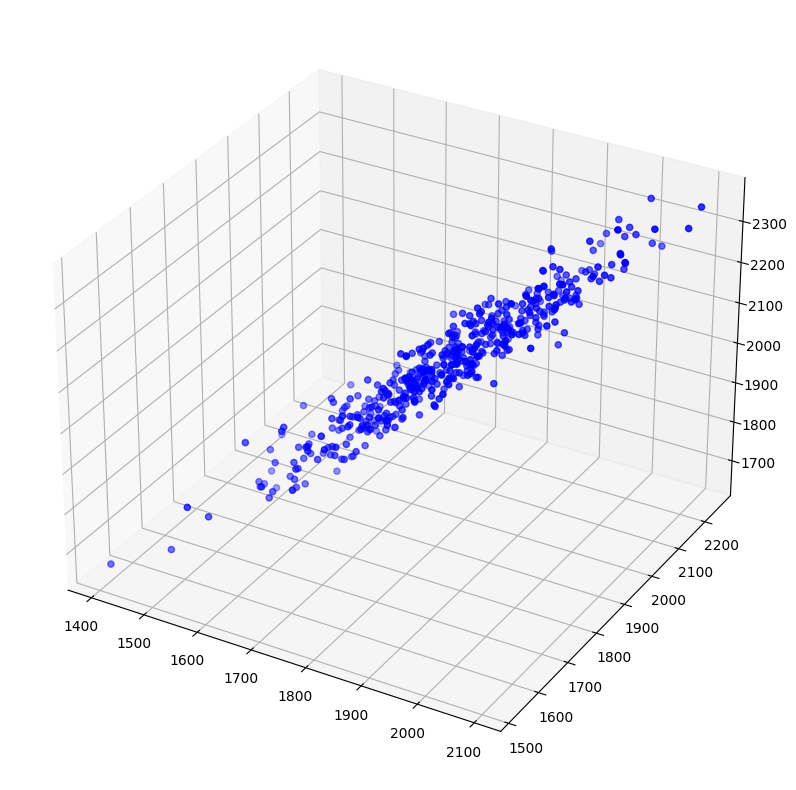

In [7]:
#plot original data 3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reshaped_data[:,0], reshaped_data[:,1], reshaped_data[:,2], c='b', marker='o')

In [11]:
pca = PCA(n_components=15)
# print('% Variance per PC: ',pca.explained_variance_ratio_)

In [12]:
pca_features = pca.fit_transform(data_scaled)
print('Scaled Data shape: ',data_scaled.shape)
print('PCA Tranformed Data shape: ',pca_features.shape)

Scaled Data shape:  (500, 2556144)
PCA Tranformed Data shape:  (500, 15)


In [13]:
np.save('../data/encoded_pca.npy', pca_features)

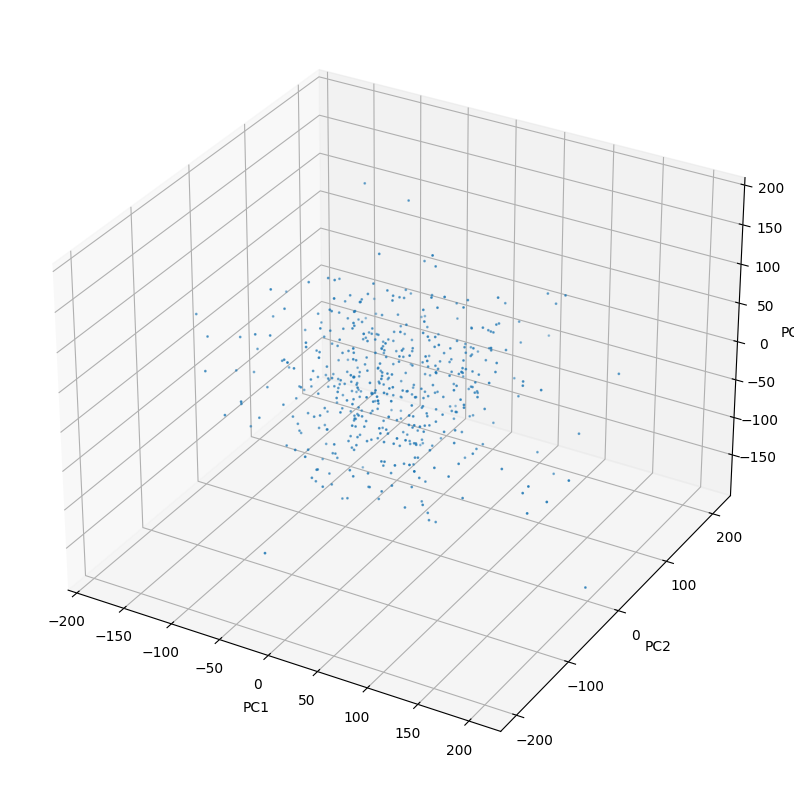

In [14]:
# ### Plot PCA Results
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_features[:,0], pca_features[:,1], pca_features[:,2], s=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()